# Imports

In [2]:

import msc


########### Magics ##########
# %matplotlib qt  # for interactive viewing of mne plots
%load_ext autoreload
%autoreload 2

# Load Data

In [16]:
picks = msc.etl.PicksOptions.one_channel

raw = msc.etl.load_raw_data(picks=picks)
print(raw)


picks: ('C3',)
Reading header...
<RawNicolet | 103001102_0113.data, 1 x 15361 (60.0 s), ~6 kB, data not loaded>


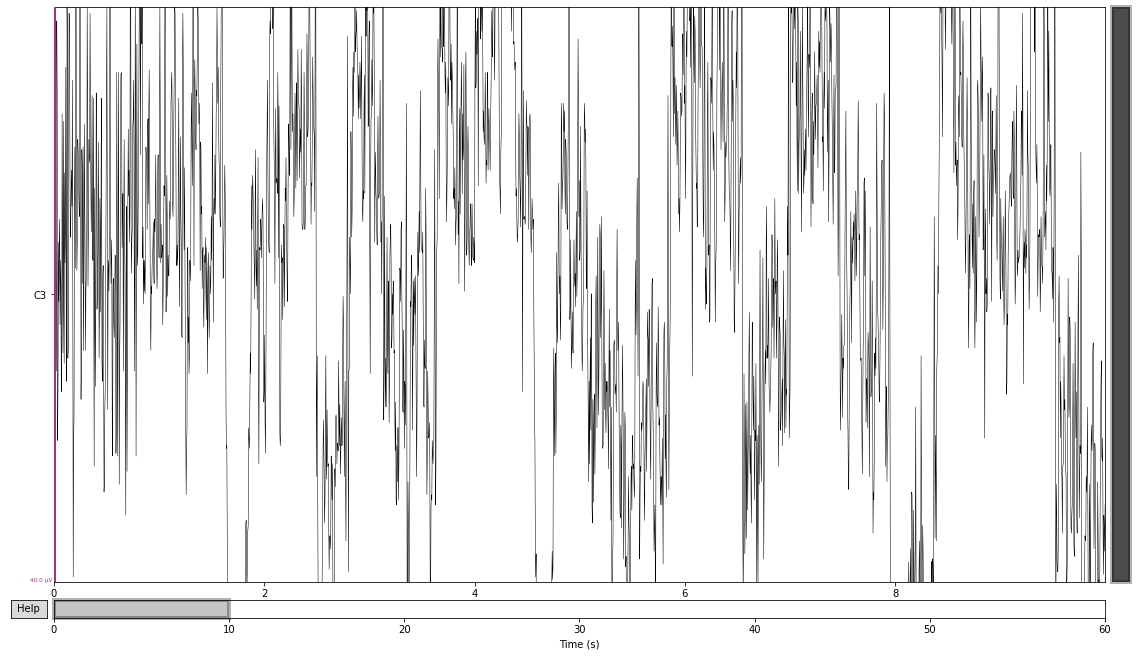

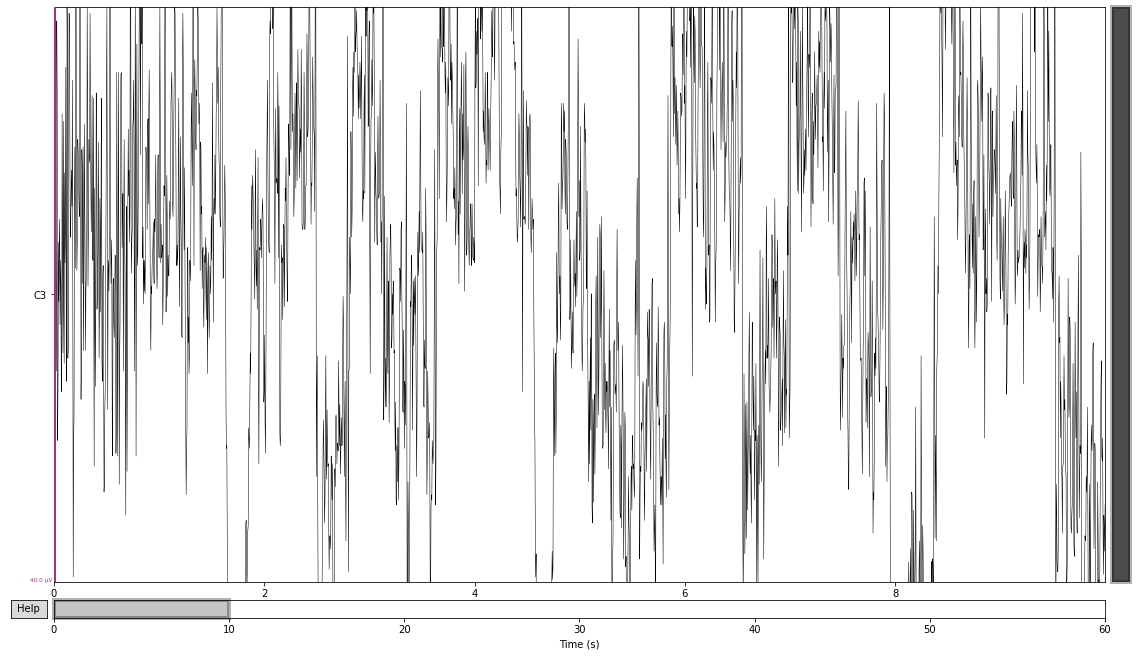

In [17]:
raw.plot()


In [18]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: C3
 chs: 1 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2008-07-13 08:07:34 UTC
 nchan: 1
 projs: []
 sfreq: 256.0 Hz
>

In [19]:
raw.to_data_frame()

,time,C3
0,0,-97.913
1,4,-91.111
2,8,-81.803
3,12,-79.655
4,16,-73.748
...,...,...
15356,59984,-30.967
15357,59988,-31.683
15358,59992,-51.015
15359,59996,-26.671


In [20]:
raw.get_data()

array([[-9.7913e-05, -9.1111e-05, -8.1803e-05, ..., -5.1015e-05,
        -2.6671e-05, -2.9893e-05]])

In [26]:
dataset = msc.etl.load_tensor_dataset(picks=msc.etl.PicksOptions.common_channels)
dataset

picks: ('FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'FZ', 'CZ', 'PZ', 'T7', 'T8', 'P7', 'P8')
Reading header...


{'x_train': array([0.00000000e+00, 3.90625000e-03, 7.81250000e-03, ...,
        5.99921875e+01, 5.99960938e+01, 6.00000000e+01]),
 'y_train': array([[-5.45950e-05, -8.14450e-05, -8.77100e-05, ..., -1.61100e-05,
          1.61100e-06, -4.11700e-06],
        [-2.27867e-04, -2.20707e-04, -2.19454e-04, ..., -2.21602e-04,
         -1.96721e-04, -1.96363e-04],
        [-6.62300e-05, -4.52870e-05, -3.49050e-05, ..., -1.41410e-05,
          5.37000e-06,  2.32700e-06],
        ...,
        [ 2.93560e-05,  3.54420e-05,  4.06330e-05, ...,  6.12180e-05,
          8.52040e-05,  8.35930e-05],
        [-9.75550e-05, -9.29010e-05, -8.52040e-05, ..., -5.78170e-05,
         -3.29360e-05, -3.63370e-05],
        [-4.26020e-05, -3.88430e-05, -3.00720e-05, ...,  7.51800e-06,
          3.32940e-05,  2.98930e-05]])}